# Bazy Groebnera: teoria i zastosowania

W niniejszym pliku prześledzimy zastosowania baz Groebnera do rozwiązywania problemów o naturze geometrycznej. Podstawowym pojęciem będzie pierścień wielomianów pewnej liczby zmiennych. Będziemy operowali ideałami w tym pierścieniu i zobaczymy jak operacje na ideałach pozwalają nam dowodzić stwierdzeń geometrycznych o pewnych obiektach zdefiniowanych algebraicznie.

Baza Groebnera $B$ dla ideału $I$ w $R=K[x_1,\ldots x_n]$ to baza tego ideału, która spełnia warunek, że dzielenie z resztą dowolnego wielomianu z $R$ przez element z bazy $B$ daje jednoznacznie określoną resztę.

## Przykład 1

Oblicz bazę Groebnera dla ideału $I=\langle x^2+y^2-1,x+y \rangle \subset \mathbb{Q}[x,y]$. Uwaga, baza Groebnera zależy od przyjętego porządku na jednomianach.

In [1]:
R.<x,y>=PolynomialRing(Rationals(),2)
I=R.ideal([x^2+y^2-1,x+y])
I.groebner_basis()

[y^2 - 1/2, x + y]

In [2]:
R.<y,x>=PolynomialRing(Rationals(),2)
I=R.ideal([x^2+y^2-1,x+y])
I.groebner_basis()

[x^2 - 1/2, y + x]

Dzielenie z resztą wielomianów przez elementy z bazy Groebnera pozwala jednoznacznie je zredukować.

In [10]:
aa=(x^3+y^3-1)
bb=(x^2+y^2-1)
cc=(x+y)

In [16]:
aa-y^2*cc-x^2*cc

-y^2*x - y*x^2 - 1

In [17]:
dd=y^2-1/2

In [21]:
aa-y^2*cc-x^2*cc+dd*x+y*x*cc-dd*x

-1

In [22]:
aa+1 in I

True

Niech $V(S) = \{(x_1,\ldots,x_n)\in K^n: \forall_{f\in S} f(x_1,\ldots,x_n)=0\}$ będzie zbiorem zer podzbioru wielomianów $S$. Jest to inaczej zbiór rozwiązań układu równań algebraicznych zadanych przez bazę ideału rozpiętego na elementach $S$.

Obliczanie bazy Grobnera $B(I)$ ideału $I$ pozwala uprościć opis zbioru $V(I)$. 

Ponadto $V(I) = V(B(I))$

## Przykład 2

Wyznacz zbiór $V(I)$ zer w $\mathbb{Q}$ układu równań $x^3+y^3-1=0$, $x+y-1=0$ (inaczej ideału $I=\langle x^3+y^3-1, x+y-1 \rangle$)

In [24]:
R.<x,y>=PolynomialRing(Rationals(),2)
I=R.ideal([x^3+y^3-1,x+y-1])
I.groebner_basis()

[y^2 - y, x + y - 1]

Zatem $V(I)$ jest równoważnie zbiorem rozwiązań układu $y^2-y=0$, $x+y-1$. Pierwsze równanie ma rozwiązania w $\mathbb{Q}$ postaci $y=0,1$. Odpowiadające im wartości zmiennej $x$ to $x=1$ i $x=0$, odpowiednio.

In [27]:
V=AffineSpace(R).subscheme(I)
V.rational_points()

[(0, 1), (1, 0)]

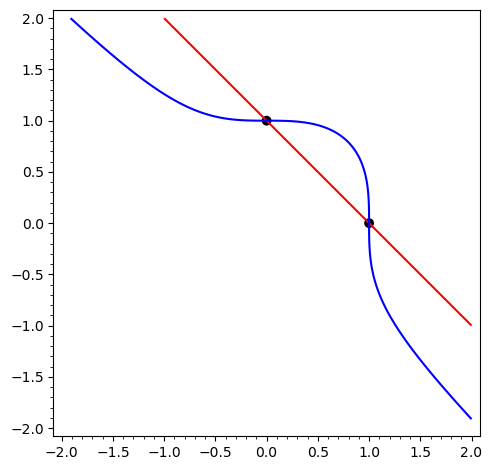

In [3]:
X,Y=var('X,Y')

gra=Graphics()
gra+=implicit_plot(X+Y-1,(X,-2,2),(Y,-2,2),color='red')
gra+=point((0,1),pointsize=50,color='black')+point((1,0),pointsize=50,color='black')
gra+=(implicit_plot(X^3+Y^3-1,(X,-2,2),(Y,-2,2)))

gra.show()

## Przykład 3

Wyznacz ekstrema funkcji $f(x,y)=x+y^2$ na elipsie $x^2+2y^2=3$.

Stosujemy do tego zadania technikę mnożników Lagrange'a.

Niech $F(x,y,m)=f(x,y)-m (x^2+2 y^2-3)$. Obliczamy ideał $I$ w $K[x,y,m]$ zadany pochodnymi cząstkowymi $\delta_{x}F(x,y,m),\delta_{y}F(x,y,m),\delta_{m}F(x,y,m)$. 

Wyznaczamy zbiór $V(I)$ (stosując najlepiej bazę Groebnera).

In [57]:
R.<x,y,m>=PolynomialRing(Rationals(),3)
F=x+y^2-m*(x^2+2*y^2-3)

I=R.ideal([F.derivative(t) for t in [x,y,m]])
I.groebner_basis()

[x^2 - x + 6*m - 3, x*y - y, y^2 + 1/2*x - 3*m, x*m - 1/2, y*m - 1/2*y, m^2 + 1/12*x - 1/2*m - 1/12]

Baza Groebnera poprzez wygodne faktoryzacje wielomianów pozwala nam rozłożyć zbiór $V(I)$ na sumę innych algebraicznych zbiorów.

In [60]:
AffineSpace(R).subscheme(I.groebner_basis()).irreducible_components()

[
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  2*m - 1,
  y - 1,
  x - 1,
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  2*m - 1,
  y + 1,
  x - 1,
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  y,
  x - 6*m,
  12*m^2 - 1
]

Zatem ekstrema funkcji $f(x,y)$ na elipsie $x^2+y^2-3=0$ zawierają się w zbiorze:

$(x,y)=(1,1)$, $(x,y)=(1,-1)$ oraz $(x,y)=(\pm\sqrt{3},0)$.

In [61]:
(x+y^2).subs({x:1,y:1})

2

In [62]:
(x+y^2).subs({x:1,y:-1})

2

In [63]:
(x+y^2).subs({x:sqrt(3),y:0})

sqrt(3)

In [64]:
(x+y^2).subs({x:-sqrt(3),y:0})

-sqrt(3)

Zatem maksimum dla funkcji $f$ ograniczonej do elipsy pojawia się w punkcie $(1,1)$ i $(1,-1)$ i wynosi $2$. Minimum pojawia się w puncie $(-\sqrt{3},0)$ i wynosi $-\sqrt{3}$. 

Wyznaczmy teraz ekstrema obliczając parametryzację elipsy i podstawiając $x=x(t)$ oraz $y=y(t)$ do funkcji $f(x,y)$ i obliczając ekstremum funkcji $g(t)=f(x(t),y(t))$.

### Parametryzacja elipsy

Znajdujemy jeden punkt na elipsie, np. $(1,1)$.

Wyznaczamy pęk prostych przechodzących przez zadany punkt, np.

$L:t x+ b = y$

$L$ zawiera punkt $(1,1)$, zatem $t+b = 1$, stąd $L: t x + (1-t)  = y$. 

Podstawiamy zmienną $y$ do równania elipsy i wyznaczamy zmienną $x$ jako funkcję $t$.

In [1]:
R.<x,y,t>=PolynomialRing(Rationals(),3)
f2=(x^2+2*y^2-3).subs({y:t*x+(1-t)}).factor()[1][0]

In [2]:
X,T=var('X,T')
eq1=f2.subs({x:X,t:T})
xt=solve(eq1,X)[0].rhs().subs({T:t})
yt=t*xt+(1-t)
(x^2+2*y^2-3).subs({x:xt,y:yt}).subs({t:T}).simplify_full()

0

In [3]:
gt=(x+y^2).subs({x:xt,y:yt}).subs({t:T}).simplify_full()

In [4]:
gt

8*(T^4 - T)/(4*T^4 + 4*T^2 + 1)

In [5]:
gt.derivative(T).simplify_full().factor()

8*(2*T^2 + 2*T - 1)*(2*T + 1)/(2*T^2 + 1)^3

In [6]:
sol=solve((2*T^2 + 2*T - 1)*(2*T + 1),T)
sol

[T == -1/2*sqrt(3) - 1/2, T == 1/2*sqrt(3) - 1/2, T == (-1/2)]

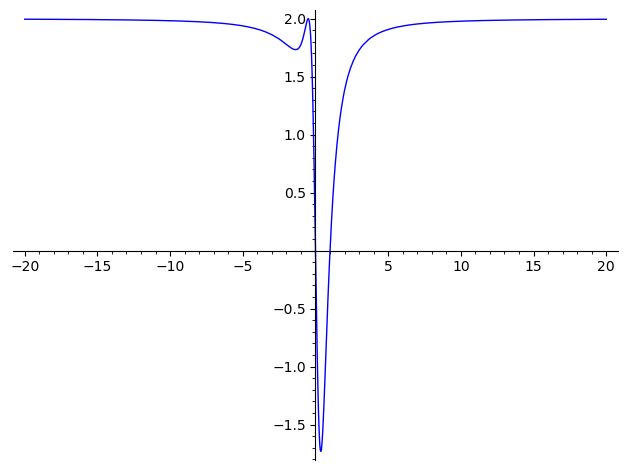

In [7]:
plot(gt,(t,-20,20))

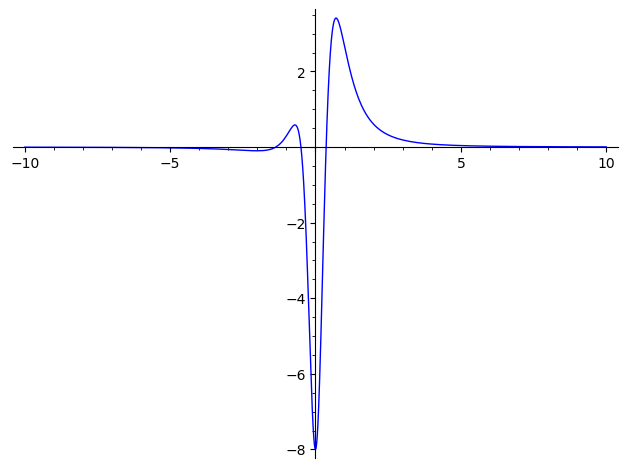

In [8]:
plot(gt.derivative(T),(T,-10,10))

In [77]:
xt.subs({t:-1/2})

1

In [88]:
Z.<x>=PolynomialRing(Rationals())
pol=2*x^2 + 2*x - 1
K.<t1>=NumberField(pol)

xv=(2*t1^2 - 4*t1 - 1)/(2*t1^2 + 1) #xt
yv=(2*t1^2 - 4*t1 - 1)*t1/(2*t1^2 + 1) - t1 + 1 #yt

In [90]:
(xv,yv)

(-2*t1 - 1, 0)

In [91]:
xv.minpoly()

x^2 - 3

## Przykład 4

Kolorowanie grafu. Ile jest różnych kolorowań cyklu 4 elementowego n kolorami?



In [2]:
R=PolynomialRing(Rationals(),4,'x')
R.gens()

(x0, x1, x2, x3)

In [5]:
#wielomian wierzchołkowy

N=3 #liczba kolorów

gens=R.gens()
F=lambda x: prod([x-i for i in range(0,N)])

In [123]:
vpol=[F(x) for x in gens] #wielomiany wierzchołkowe

In [118]:
n=len(gens)
epol=[(F(gens[i])-F(gens[(i+1)%n]))/(gens[i]-gens[(i+1)%n]) for i in range(0,n)]  #wielomiany krawędziowe

Teraz wykorzystamy bazy Groebnera do obliczenia liczby rozwiązań.

In [127]:
V=AffineSpace(R).subscheme(R.ideal(vpol + epol).groebner_basis())

In [128]:
V.rational_points()

[(0, 1, 0, 1),
 (0, 1, 0, 2),
 (0, 1, 2, 1),
 (0, 2, 0, 1),
 (0, 2, 0, 2),
 (0, 2, 1, 2),
 (1, 0, 1, 0),
 (1, 0, 1, 2),
 (1, 0, 2, 0),
 (1, 2, 0, 2),
 (1, 2, 1, 0),
 (1, 2, 1, 2),
 (2, 0, 1, 0),
 (2, 0, 2, 0),
 (2, 0, 2, 1),
 (2, 1, 0, 1),
 (2, 1, 2, 0),
 (2, 1, 2, 1)]

In [129]:
len(V.rational_points()) #liczba kolorowań trzema kolorami

18

In [151]:
#liczba kolorowań N kolorami cyklu długosci m

def Kol(N,m):
    R=PolynomialRing(Rationals(),m,'x')
    gens=R.gens()
    F=lambda x: prod([x-i for i in range(0,N)])
    vpol=[F(x) for x in gens] #wielomiany wierzchołkowe
    n=len(gens)
    epol=[(F(gens[i])-F(gens[(i+1)%n]))/(gens[i]-gens[(i+1)%n]) for i in range(0,n)]  #wielomiany krawędziowe
    V=AffineSpace(R).subscheme(R.ideal(vpol + epol).groebner_basis())
    return V.rational_points()

In [140]:
[len(Kol(2,i)) for i in range(2,10)]

[2, 0, 2, 0, 2, 0, 2, 0]

In [141]:
[len(Kol(3,i)) for i in range(2,10)]

[6, 6, 18, 30, 66, 126, 258, 510]

In [153]:
[len(Kol(4,i)) for i in range(2,7)]

[12, 24, 84, 240, 732]

In [148]:
len(Kol(3,5).rational_points())

30

## Przykład 5 

Niech $a,b,c$ będą pewnymi liczbami zespolonymi. Wiedząc, że

$a+b+c=m,$

$a^2+b^2+c^2=n,$

$a^3+b^3+c^3=k$

wyznacz sumę $a^4+b^4+c^4$ jako wyrażenie zależne tylko od $m,n,k$.

In [154]:
R.<a,b,c,m,n,k,r>=PolynomialRing(Rationals(),7)
eq1=[a+b+c-m,a^2+b^2+c^2-n,a^3+b^3+c^3-k,a^4+b^4+c^4-r]
I=R.ideal(eq1)
I.groebner_basis()

In [155]:
I.groebner_basis()

[m^4 - 6*m^2*n + 3*n^2 + 8*m*k - 6*r, c^3 - c^2*m + 1/2*c*m^2 - 1/6*m^3 - 1/2*c*n + 1/2*m*n - 1/3*k, b^2 + b*c + c^2 - b*m - c*m + 1/2*m^2 - 1/2*n, a + b + c - m]

In [156]:
relacja=I.groebner_basis()[0]

In [157]:
relacja

m^4 - 6*m^2*n + 3*n^2 + 8*m*k - 6*r

In [159]:
rozw=(8*k*m + m^4 - 6*m^2*n + 3*n^2)/6

In [160]:
relacja.subs({r:rozw})

0